In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# Fetch the wine quality dataset from OpenML by its dataset ID (ID=1464)
wine_data = fetch_openml(data_id=1464)

# Convert to a pandas DataFrame
data = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
data['quality'] = wine_data.target

# Check data types of the columns
print("Data types of columns:")
print(data.dtypes)

# Convert all columns to numeric (in case there are non-numeric values stored as strings)
# We can use `pd.to_numeric()` with errors='coerce' to force invalid parsing to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Show basic information about the dataset
print("\nDataset information:")
print(data.info())

# Check if any columns have NaN values (due to invalid string conversion)
print("\nCheck for missing values after conversion:")
print(data.isnull().sum())

# Drop rows with missing values (optional, or you could fill NaNs with a value like 0 or mean)
data = data.dropna()

# Show the first few rows of the data
print("\nFirst few rows of the dataset:")
print(data.head())

# Split the data into features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


Data types of columns:
V1            int64
V2            int64
V3            int64
V4            int64
quality    category
dtype: object

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   V1       748 non-null    int64
 1   V2       748 non-null    int64
 2   V3       748 non-null    int64
 3   V4       748 non-null    int64
 4   quality  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None

Check for missing values after conversion:
V1         0
V2         0
V3         0
V4         0
quality    0
dtype: int64

First few rows of the dataset:
   V1  V2     V3  V4  quality
0   2  50  12500  98        2
1   0  13   3250  28        2
2   1  16   4000  35        2
3   2  20   5000  45        2
4   1  24   6000  77        1


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=columns)

# Step 3: Preprocess the data
# Replace '?' with NaN and drop missing values
data = data.replace('?', np.nan).dropna()
data = data.astype(float)

# Split data into features (X) and target (y)
X = data.drop("target", axis=1)
y = (data["target"] > 0).astype(int)  # Convert to binary classification: 0 for no disease, 1 for disease

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60


Confusion Matrix:
 [[32  4]
 [ 4 20]]


Accuracy: 95.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



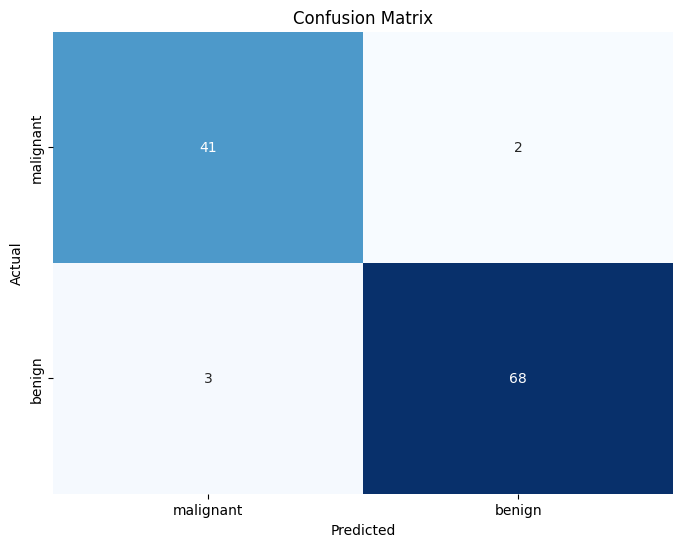

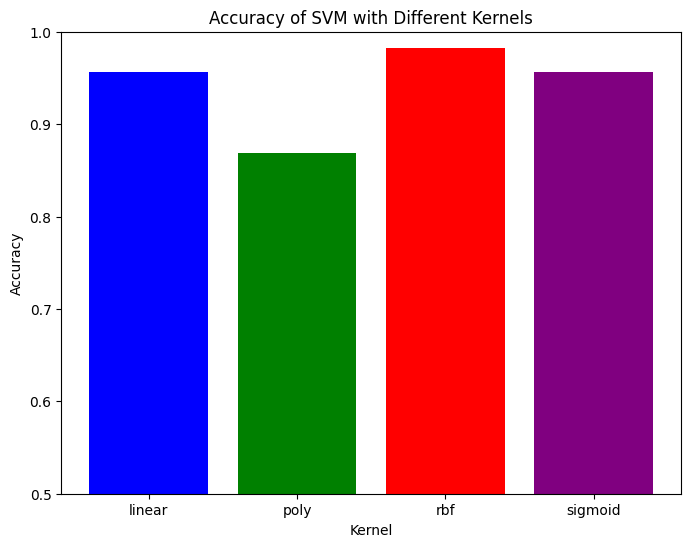

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize accuracy across different kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy for each kernel
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM with Different Kernels')
plt.ylim([0.5, 1])
plt.show()

In [ ]:
# Step 1: Install the necessary package
!pip install nycflights13

# Step 2: Import Libraries
import pandas as pd
from nycflights13 import flights
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 3: Load and Preprocess Data
# Load the flights dataset
data = flights

# Define 'Delayed' column based on arrival delay
# A flight is considered "delayed" if the arrival delay is more than 15 minutes
data['Delayed'] = (data['arr_delay'] > 15).astype(int)

# Drop rows with missing values for relevant columns
data = data.dropna(subset=['dep_time', 'sched_dep_time', 'dep_delay', 'arr_delay', 'distance'])

# Select features and target variable
# Using 'dep_time', 'sched_dep_time', 'dep_delay', and 'distance' as features
X = data[['dep_time', 'sched_dep_time', 'dep_delay', 'distance']]
y = data['Delayed']

# Step 4: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nycflights13: filename=nycflights13-0.0.3-py3-none-any.whl size=8732723 sha256=b62892d55dba64e00c6f1b02747206ee1fc1750122c5c345e715494a1d81d103
  Stored in directory: /root/.cache/pip/wheels/64/14/67/ed3bbff6405d6163cfd64d58169cc9284ce9a80c263e759fbe
Successfully built nycflights13
Accuracy: 0.8839468458836108
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     49838
           1       0.81      0.67      0.74     15632

    accuracy                           0.88     65470
   macro avg       0.86      0.81      0.83     65470
weighted avg       0.88      0.88      0.88     65470



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0778
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0383
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0350
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0379
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0350
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0396
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0378
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0398
Epoch 9/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0387
Epoch 10/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0353
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


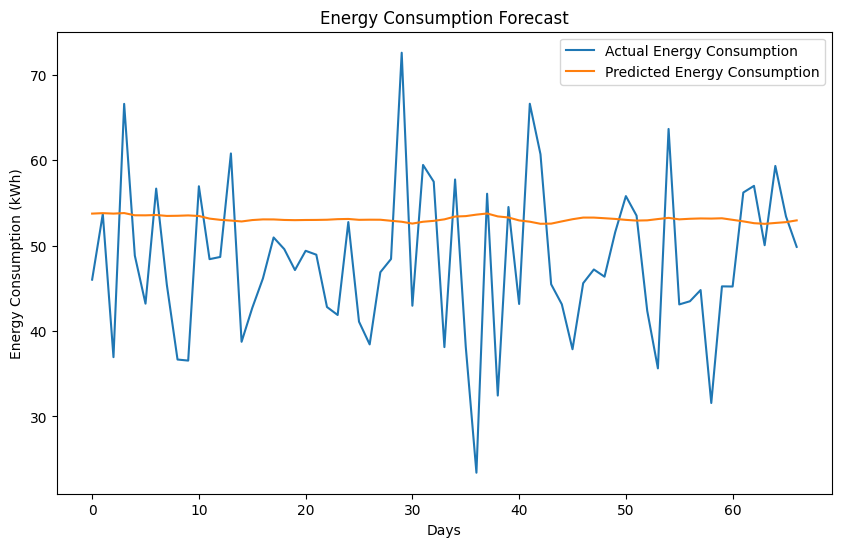

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Generate sample data (replace this with your own dataset)
# Assuming daily energy consumption in kilowatt-hours (kWh) over 365 days
np.random.seed(0)
data = np.random.normal(loc=50, scale=10, size=365)  # Sample data generation

# Create a DataFrame
df = pd.DataFrame(data, columns=['Energy_Consumption'])
df.index = pd.date_range(start='1/1/2022', periods=len(df), freq='D')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Energy_Consumption']])

# Prepare data for LSTM model
def create_sequences(data, seq_length=30):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

sequence_length = 30
x, y = create_sequences(scaled_data, sequence_length)

# Reshape data to 3D for LSTM [samples, time steps, features]
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Split data into train and test sets
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

# Predict using the test set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling

# Prepare test data for plotting
actual_values = scaler.inverse_transform([y_test]).reshape(-1, 1)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(actual_values, label='Actual Energy Consumption')
plt.plot(predictions, label='Predicted Energy Consumption')
plt.title('Energy Consumption Forecast')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()
